In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.1f}'.format)

In [ ]:
from google.colab import files
archivo = files.upload()

df = pd.read_csv("spotify-2023.csv", encoding='latin1')

Saving spotify-2023.csv to spotify-2023 (2).csv


In [ ]:
df.shape

(953, 24)

In [ ]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
# Combinamos las 3 columnas de fechas de lanzamientos en una
df['release_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' +
                                    df['released_month'].astype(str) + '-' +
                                    df['released_day'].astype(str))

In [ ]:
df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [ ]:
df

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [ ]:
# Vemos si hay filas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
# Vemos si hay duplicados para la columna track name
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
417,Die For You,Joji,1,1703,0,246390068,38,45,36,16,0,148,G#,Major,47,15,52,38,13,29,5,2022-11-04
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",2,10585,0,473248298,126,108,406,0,0,143,D,Major,60,86,32,88,0,34,6,1950-01-01
482,SPIT IN MY FACE!,ThxSoMch,1,573,0,301869854,1,0,18,0,24,166,C#,Major,70,57,57,9,20,11,7,2022-10-31
616,Take My Breath,The Weeknd,1,6392,0,432702334,174,73,344,0,0,121,G#,Major,75,53,74,2,0,11,5,2021-08-06
764,About Damn Time,Lizzo,1,9021,0,723894473,242,49,272,21,24,109,A#,Minor,84,72,74,10,0,34,7,2022-04-14
825,Flowers,Lauren Spencer Smith,1,801,0,184826429,42,9,24,1,1,138,D#,Major,70,31,44,84,0,9,39,2021-08-09
831,Daylight,Harry Styles,1,2775,0,290833204,21,11,40,0,0,146,NaN,Major,69,63,45,48,0,18,4,2022-05-20
852,Numb,"Marshmello, Khalid",2,3879,2,295307001,107,76,86,1,9,120,NaN,Minor,91,63,77,12,1,10,5,2022-06-10
873,SNAP,Rosa Linn,1,1818,0,711366595,3,0,63,0,353,170,NaN,Major,56,52,64,11,0,45,7,2022-03-19
922,Miss You,Southstar,1,2020,0,154356956,77,10,119,0,40,145,A,Major,66,24,58,17,0,19,5,1982-05-16


In [ ]:
#df['streams'] = pd.to_numeric(df['streams'])
# Nos aparece un error en la fila 574

In [ ]:
df =df.drop([574])

In [ ]:
df['streams'] = pd.to_numeric(df['streams'])

In [ ]:
# Streams en orden descendiente
df = df.sort_values(by='streams', ascending=False)

In [ ]:
#Quitamos los duplicados en track name, manteniendo solo la primera vez que aparecen
df = df.drop_duplicates(subset='track_name', keep='first')

In [ ]:
df[df['track_name'].duplicated()]

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    object        
 9   in_deezer_charts      942 non-null    int64         
 10  in_shazam_charts      892 non-null    object        
 11  bpm                   942 non-null    int64         
 12  key                   850 non-null    object        
 13  mode                  94

In [ ]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0
in_apple_charts,0
in_deezer_playlists,0
in_deezer_charts,0


In [ ]:
df.drop(columns = ['in_shazam_charts'], inplace = True)

In [ ]:
#df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])

In [ ]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].str.replace(',', '')

In [ ]:
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            942 non-null    object        
 1   artist(s)_name        942 non-null    object        
 2   artist_count          942 non-null    int64         
 3   in_spotify_playlists  942 non-null    int64         
 4   in_spotify_charts     942 non-null    int64         
 5   streams               942 non-null    int64         
 6   in_apple_playlists    942 non-null    int64         
 7   in_apple_charts       942 non-null    int64         
 8   in_deezer_playlists   942 non-null    int64         
 9   in_deezer_charts      942 non-null    int64         
 10  bpm                   942 non-null    int64         
 11  key                   850 non-null    object        
 12  mode                  942 non-null    object        
 13  danceability_%        94

In [ ]:
def outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [ ]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'release_date'],
      dtype='object')

In [ ]:
columns = ['streams','in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_deezer_playlists' , 'in_apple_charts']

In [ ]:
for col in columns:
    n_outliers, lower_bound, upper_bound = outliers_iqr(df, col)
    print(f"{col}: {n_outliers} outliers (límites: [{lower_bound:.1f}, {upper_bound:.1f}])")

streams: 73 outliers (límites: [-659336771.0, 1474009765.0])
in_spotify_playlists: 104 outliers (límites: [-6381.6, 12965.4])
in_spotify_charts: 78 outliers (límites: [-24.0, 40.0])
in_apple_playlists: 78 outliers (límites: [-99.5, 200.5])
in_deezer_playlists: 151 outliers (límites: [-219.5, 400.5])
in_apple_charts: 9 outliers (límites: [-113.0, 207.0])


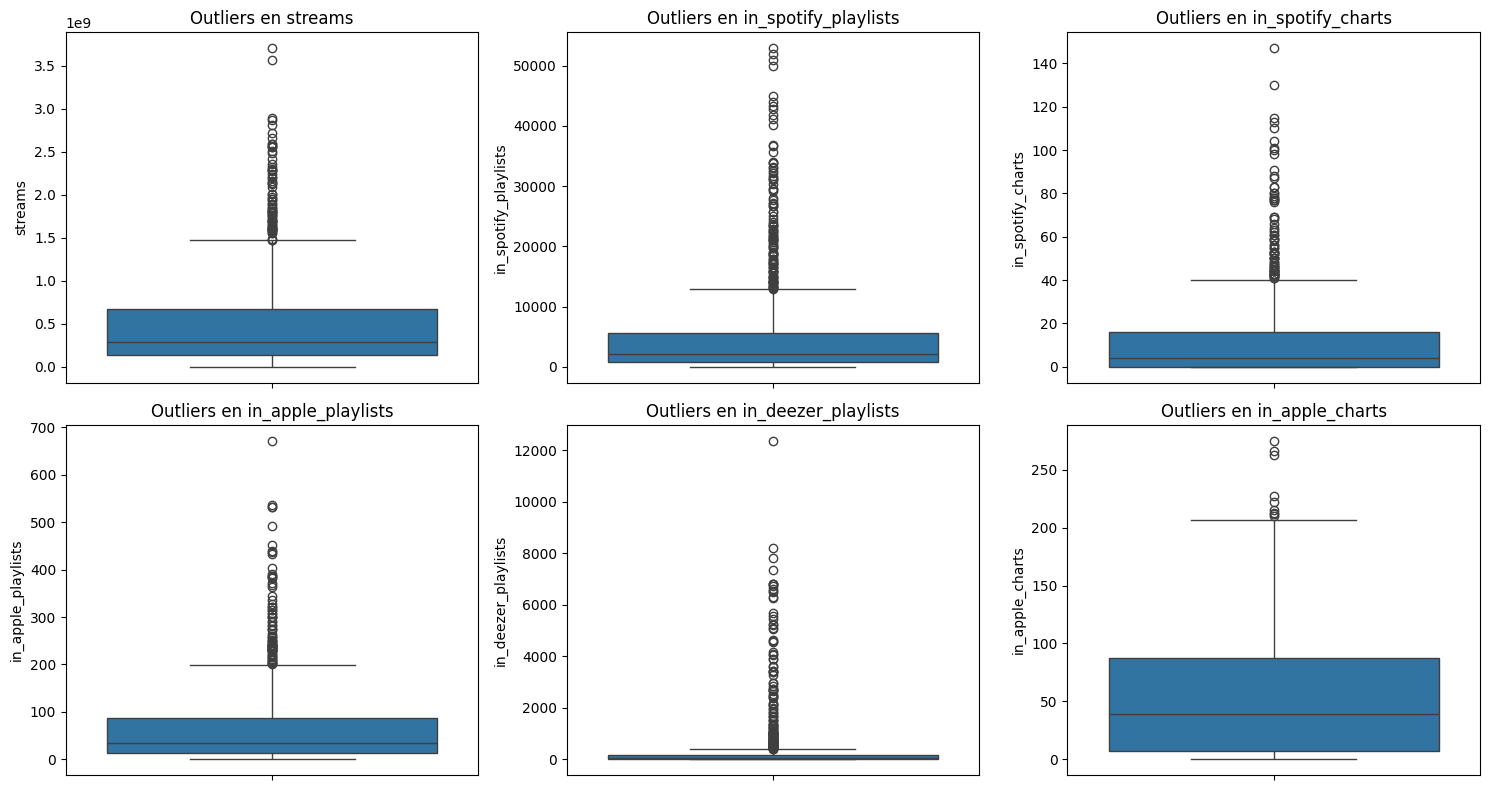

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers en {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Transformamos las variables
df_model = df.copy()


df_model['streams_log'] = np.log1p(df_model['streams'])
df_model['spotify_playlists_log'] = np.log1p(df_model['in_spotify_playlists'])
df_model['apple_playlists_log'] = np.log1p(df_model['in_apple_playlists'])
df_model['deezer_playlists_log'] = np.log1p(df_model['in_deezer_playlists'])

# Para las variables de charts
df_model['spotify_charts_sqrt'] = np.sqrt(df_model['in_spotify_charts'])
df_model['apple_charts_sqrt'] = np.sqrt(df_model['in_apple_charts'])



In [ ]:
columns2 = [
    'streams_log',
    'spotify_playlists_log',
    'apple_playlists_log',
    'deezer_playlists_log',
    'spotify_charts_sqrt',
    'apple_charts_sqrt'
]

In [ ]:
def outliers_iqr(df_model, column):
    Q1 = df_model[column].quantile(0.25)
    Q3 = df_model[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(0, Q1 - 1.5 * IQR)
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_model[(df_model[column] < lower_bound) | (df_model[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [ ]:
for col in columns2:
    n_outliers, lower_bound, upper_bound = outliers_iqr(df_model, col)
    print(f"{col}: {n_outliers} outliers (límites: [{lower_bound:.1f}, {upper_bound:.1f}])")

streams_log: 4 outliers (límites: [16.4, 22.7])
spotify_playlists_log: 2 outliers (límites: [4.0, 11.5])
apple_playlists_log: 0 outliers (límites: [0.0, 7.3])
deezer_playlists_log: 4 outliers (límites: [0.0, 8.9])
spotify_charts_sqrt: 7 outliers (límites: [0.0, 10.0])
apple_charts_sqrt: 0 outliers (límites: [0.0, 19.3])


In [ ]:
n_outliers, lower_bound, upper_bound = outliers_iqr(df_model, 'streams_log')
outliers_streams_log = df_model[(df_model['streams_log'] < lower_bound) | (df_model['streams_log'] > upper_bound)]
print(f"Outliers para 'streams_log' (total: {n_outliers}):")
display(outliers_streams_log[['track_name', 'artist(s)_name', 'streams', 'streams_log']])

Outliers para 'streams_log' (total: 4):


,track_name,artist(s)_name,streams,streams_log
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",11956641,16.3
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",11599388,16.3
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",1365184,14.1
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2762,7.9


In [ ]:
#canciones con menores streams
df_model.sort_values(by='streams', ascending=True).head(5)

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date,streams_log,spotify_playlists_log,apple_playlists_log,deezer_playlists_log,spotify_charts_sqrt,apple_charts_sqrt
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,763,26,2762,21,110,21,9,162,A#,Major,49,78,64,19,0,11,4,2022-12-09,7.9,6.6,3.1,3.1,5.1,10.5
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,138,4,1365184,13,78,2,0,105,G,Major,82,62,74,10,0,33,7,2022-12-22,14.1,4.9,2.6,1.1,2.0,8.8
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,437,31,11599388,17,29,26,3,97,NaN,Major,79,92,89,5,0,6,5,2023-07-13,16.3,6.1,2.9,3.3,5.6,5.4
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,293,8,11956641,5,2,30,2,133,B,Minor,93,68,65,42,0,12,25,2023-06-01,16.3,5.7,1.8,3.4,2.8,1.4
68,Overdrive,Post Malone,1,410,36,14780425,36,32,31,1,140,C#,Major,56,48,73,0,0,35,4,2023-07-14,16.5,6.0,3.6,3.5,6.0,5.7


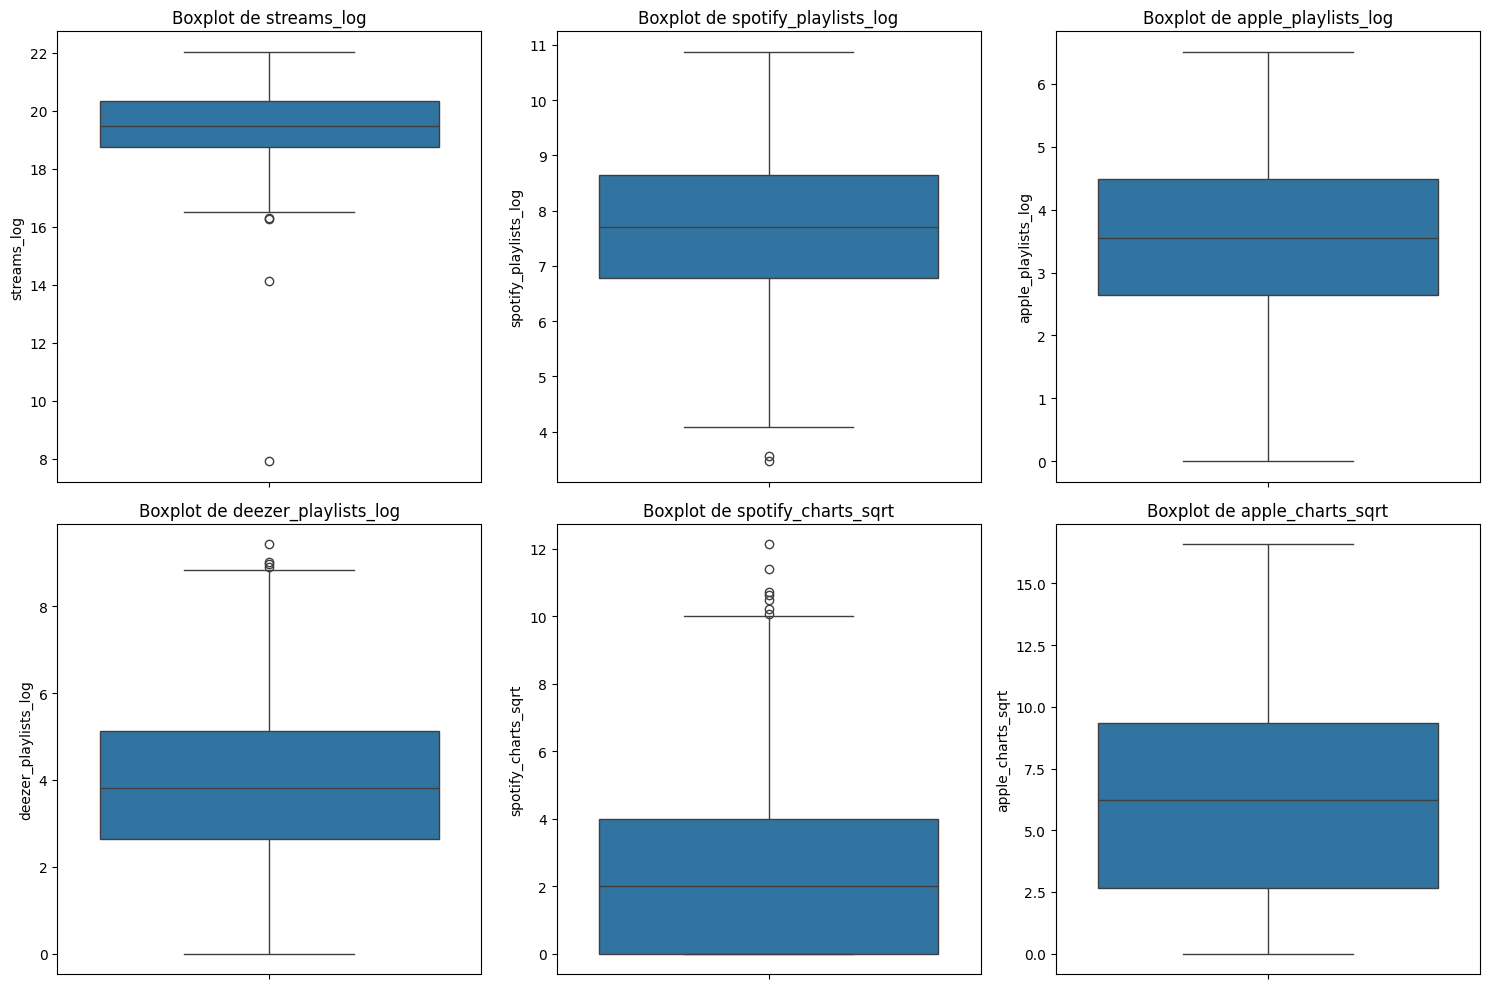

In [ ]:
columns2 = [
    'streams_log',
    'spotify_playlists_log',
    'apple_playlists_log',
    'deezer_playlists_log',
    'spotify_charts_sqrt',
    'apple_charts_sqrt'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns2, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_model[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

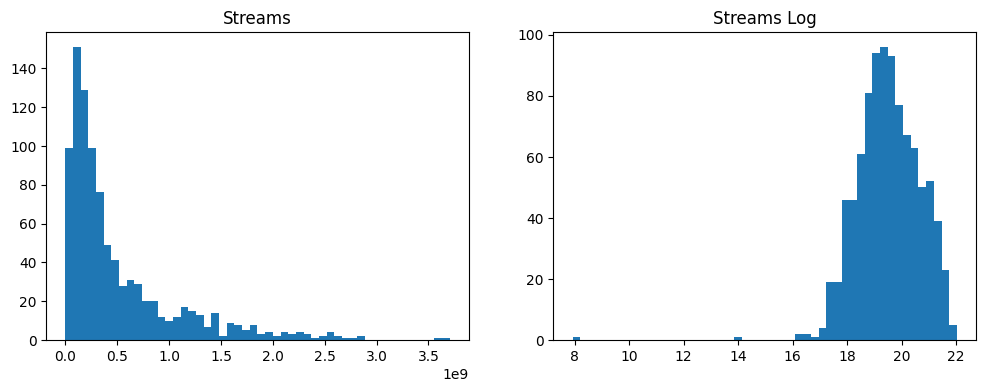

In [ ]:
# Si vemos la distribucion de df y df model en streams
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.hist(df['streams'], bins=50)
plt.title('Streams')

plt.subplot(1, 2, 2)
plt.hist(df_model['streams_log'], bins=50)
plt.title('Streams Log')
plt.show()

In [ ]:
# Contamos el número de canciones de cada artista
artist_counts = df['artist(s)_name'].value_counts()

In [ ]:
top_artistas = artist_counts.head(10)

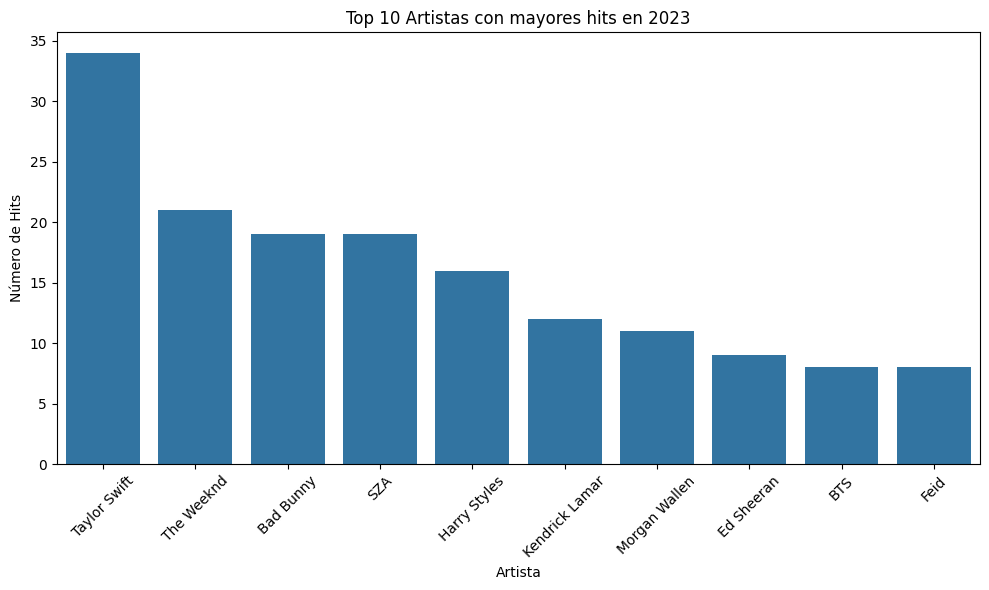

In [ ]:
plt.figure(figsize = (10, 6))

sns.barplot(x = top_artistas.index, y = top_artistas.values)

plt.title('Top 10 Artistas con mayores hits en 2023')
plt.xlabel('Artista')
plt.ylabel('Número de Hits')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


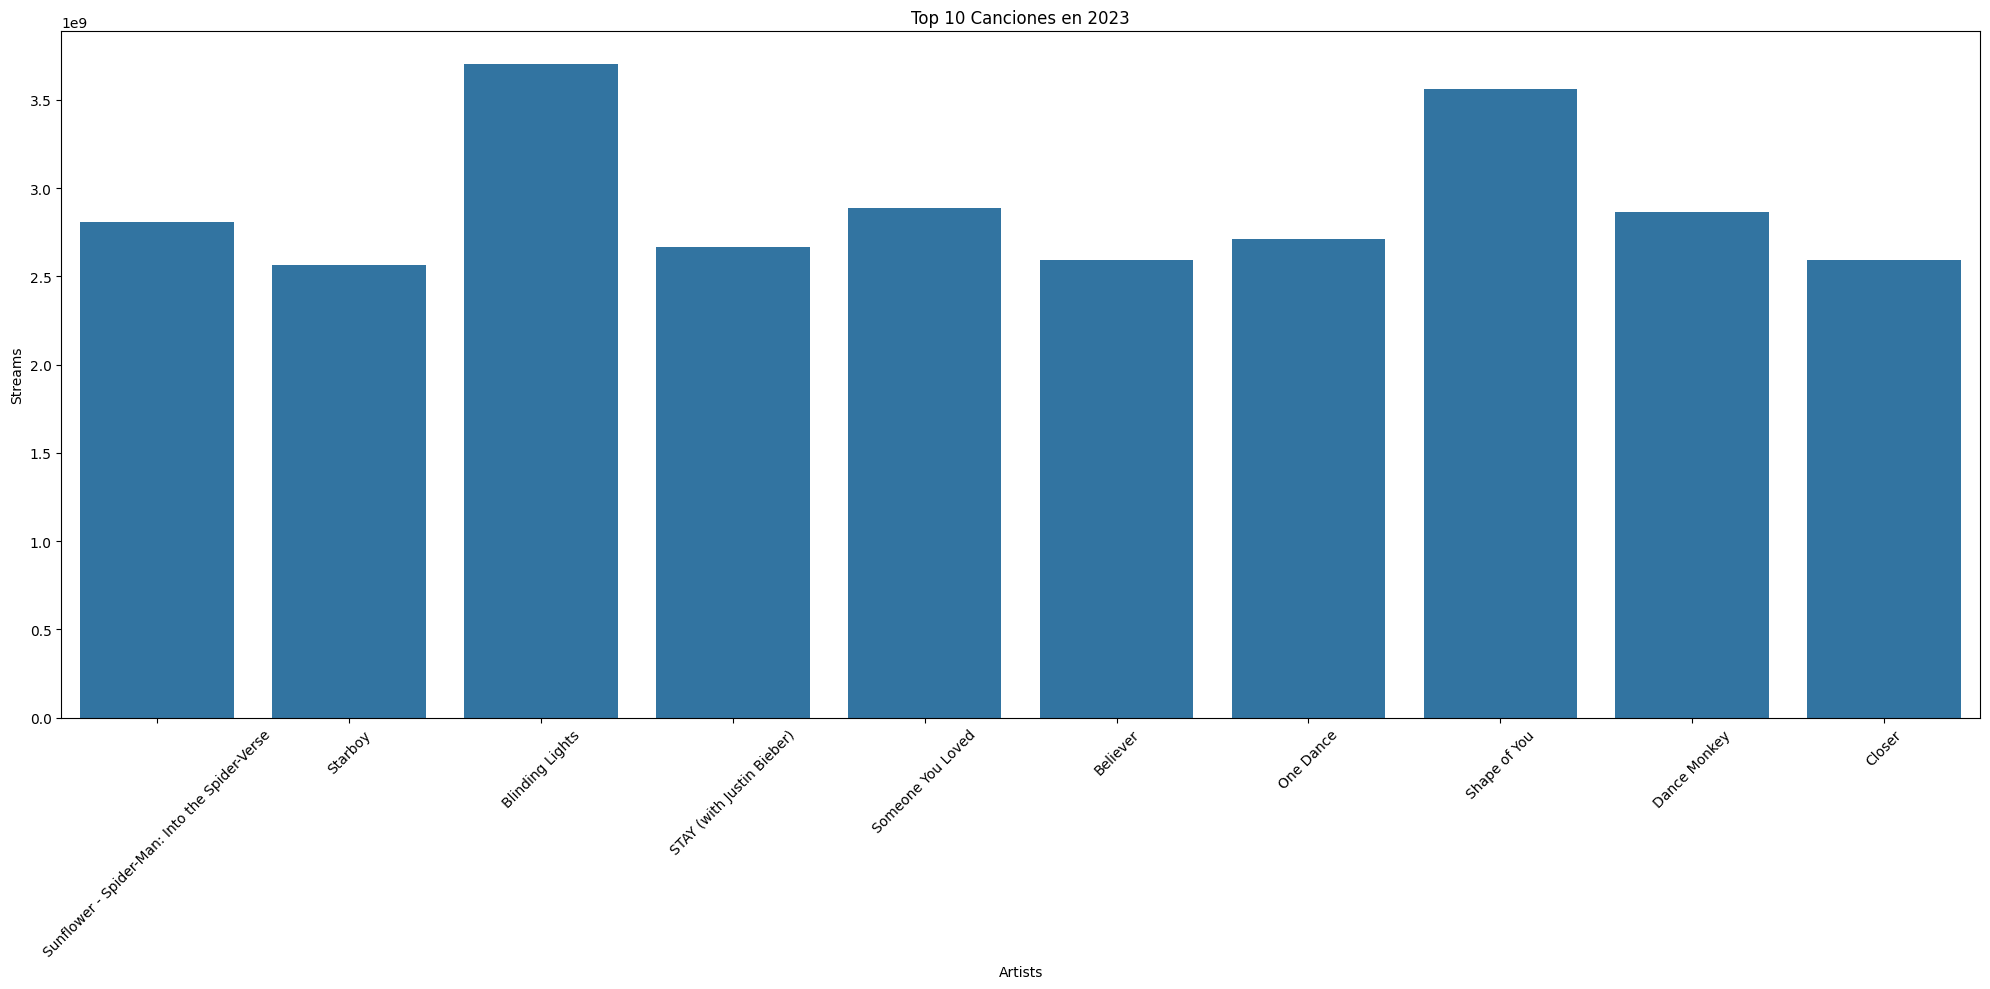

In [ ]:
plt.figure(figsize = (20, 10))

sns.barplot(x = df.track_name[:10], y = df.streams)

plt.title('Top 10 Canciones en 2023')
plt.xlabel('Artists')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

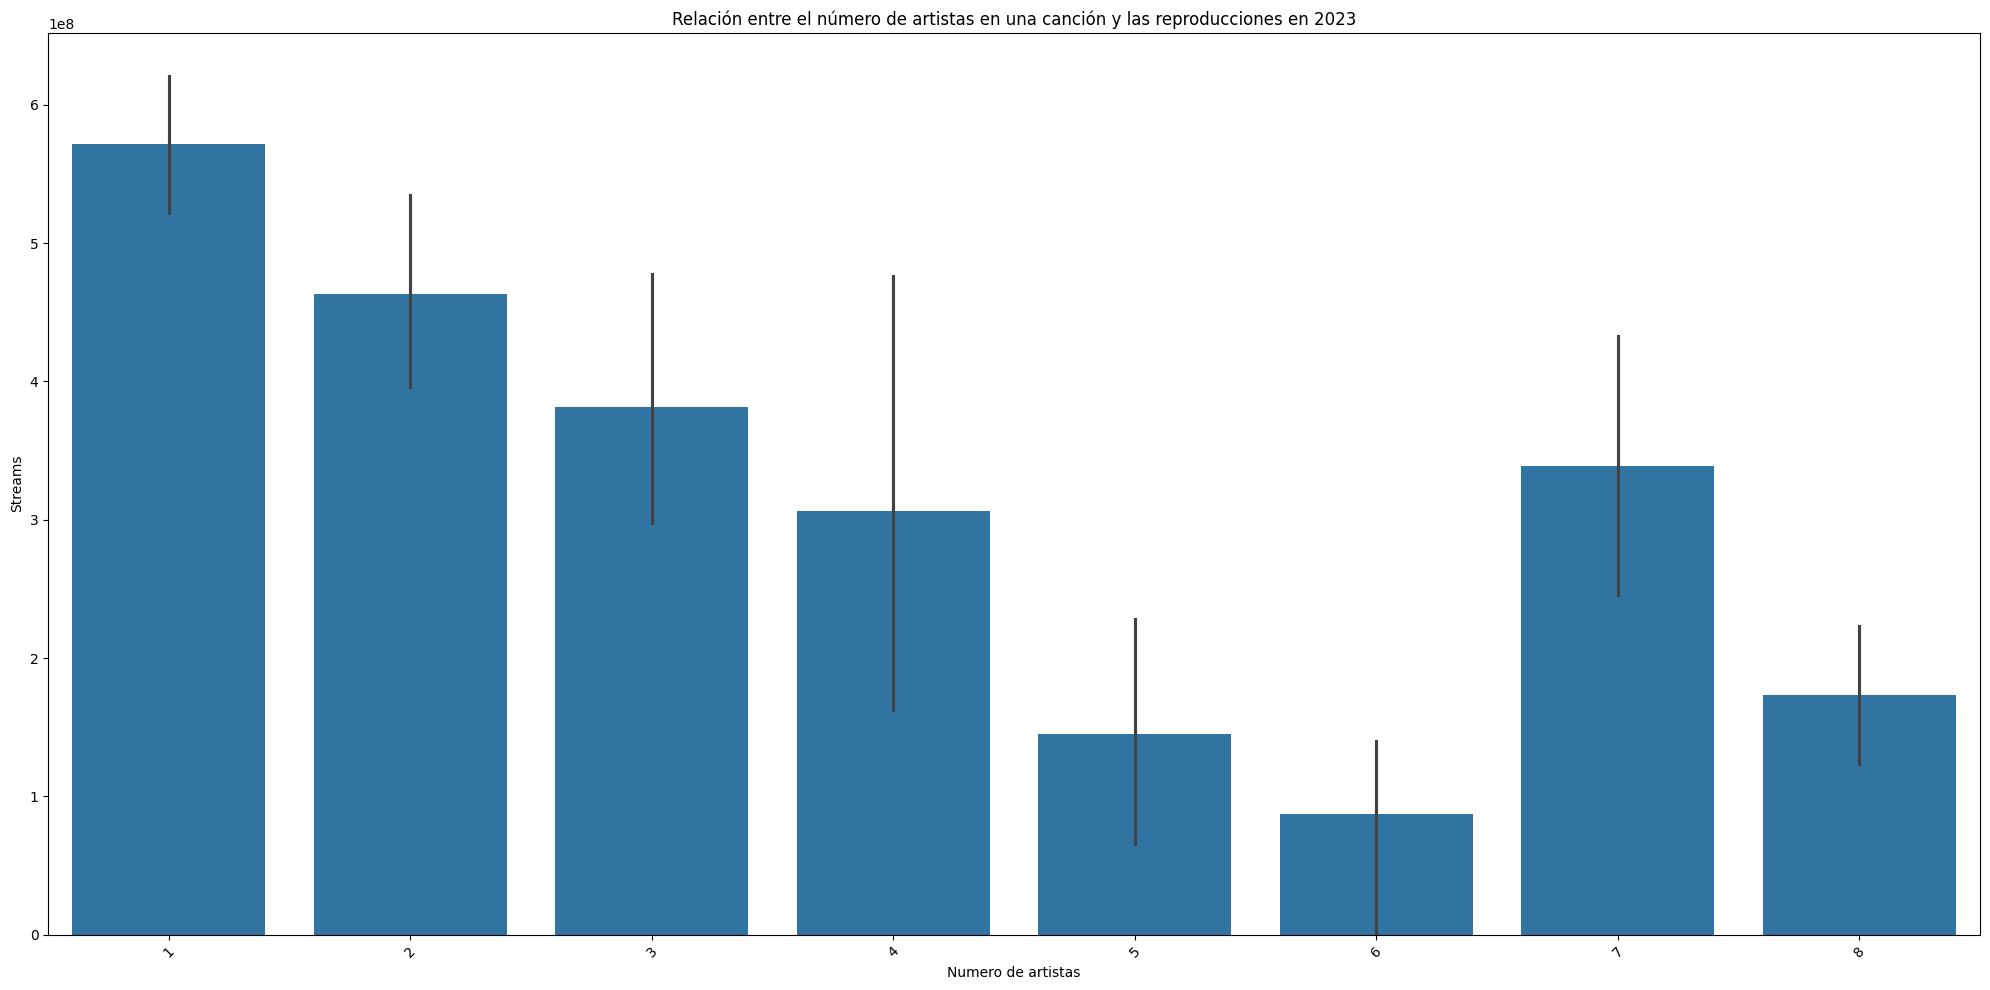

In [ ]:
plt.figure(figsize = (20, 10))

sns.barplot(x = df.artist_count, y = df.streams)

plt.title('Relación entre el número de artistas en una canción y las reproducciones en 2023')
plt.xlabel('Numero de artistas')
plt.ylabel('Streams')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

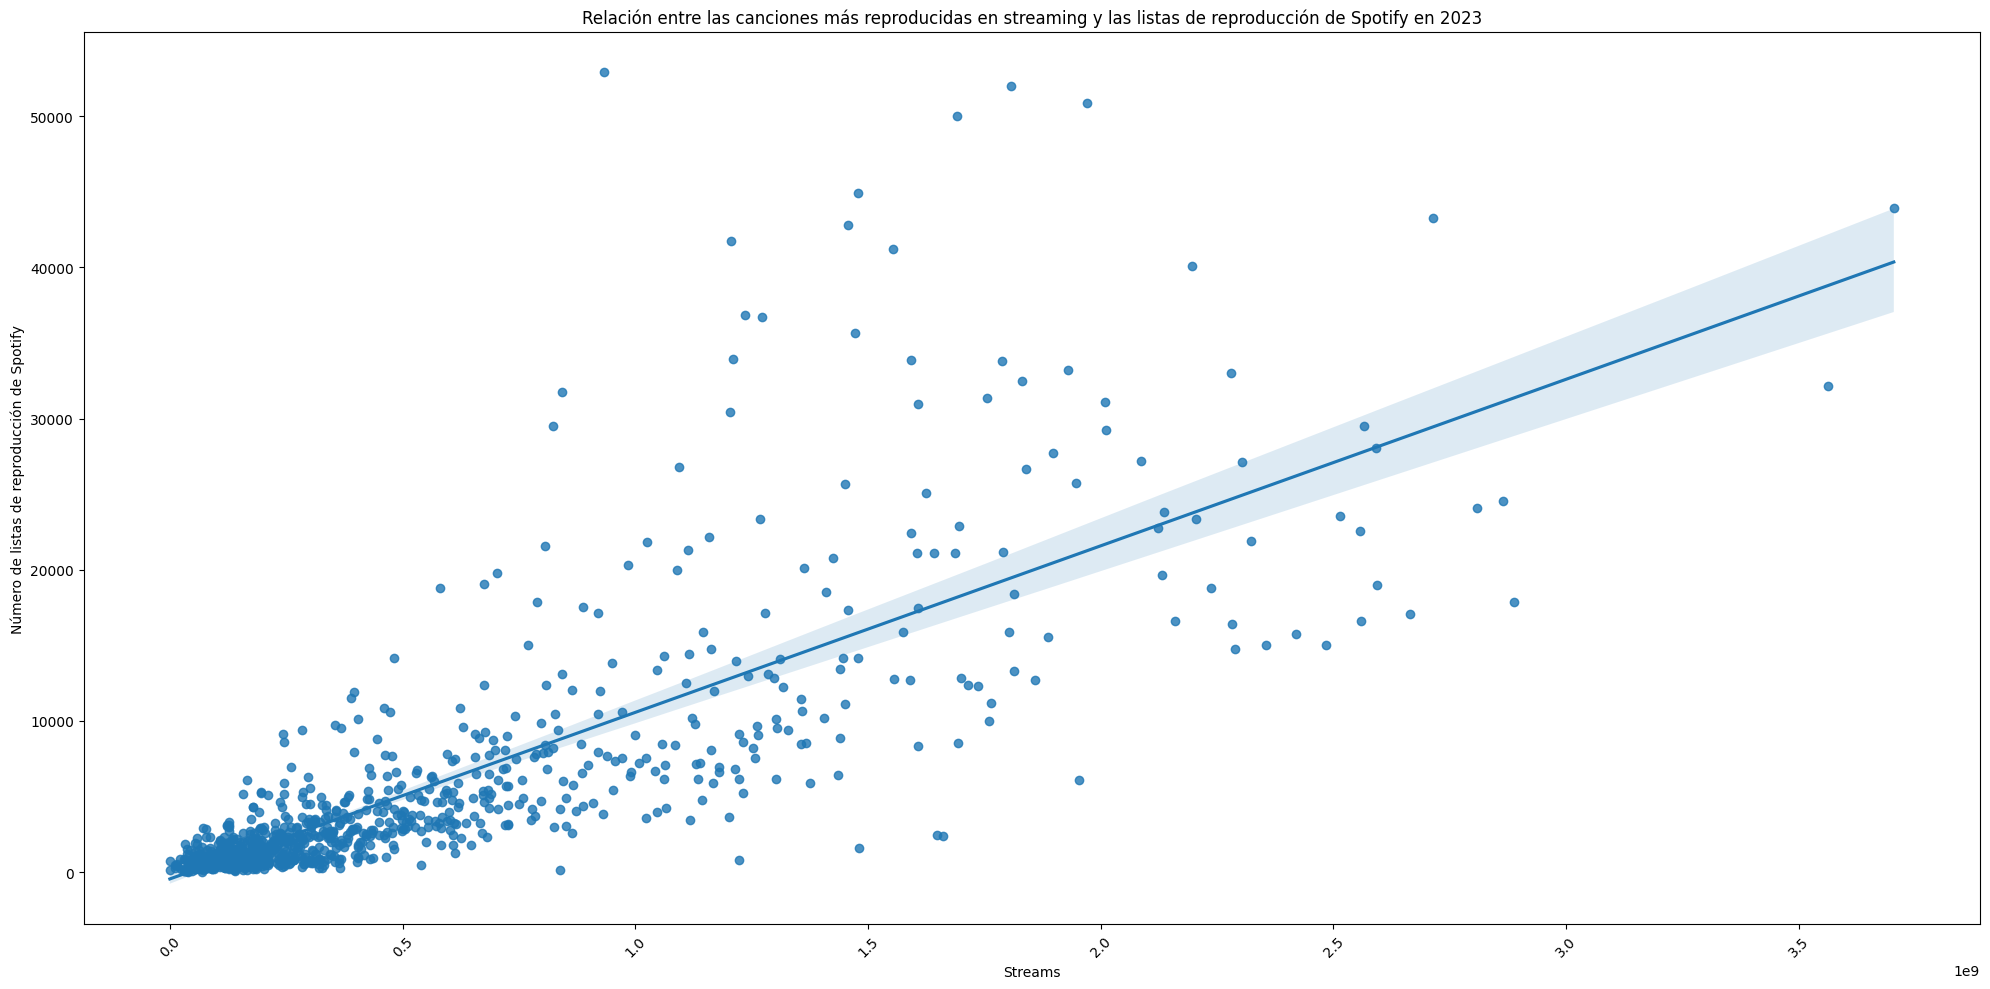

In [ ]:
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_spotify_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relación entre las canciones más reproducidas en streaming y las listas de reproducción de Spotify en 2023')
plt.xlabel('Streams')
plt.ylabel('Número de listas de reproducción de Spotify')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

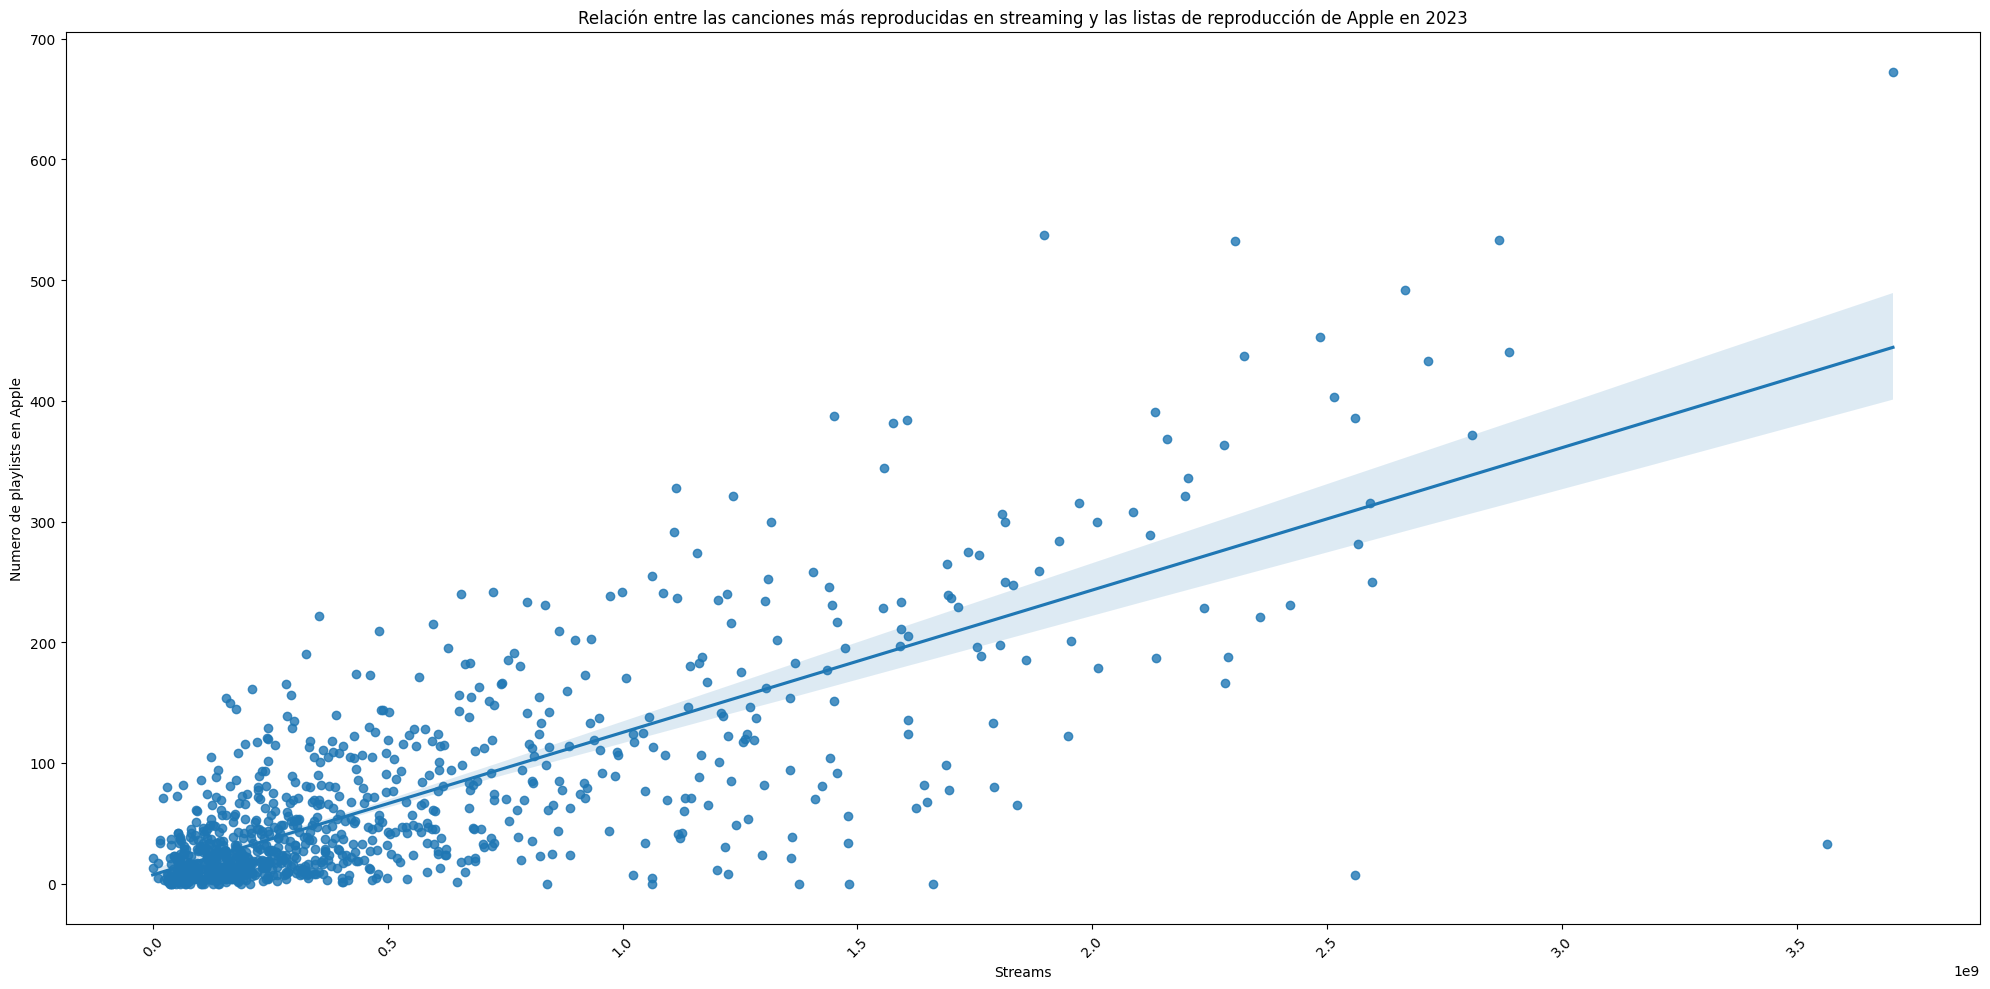

In [ ]:
#Apple
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_apple_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relación entre las canciones más reproducidas en streaming y las listas de reproducción de Apple en 2023')
plt.xlabel('Streams')
plt.ylabel('Numero de playlists en Apple')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

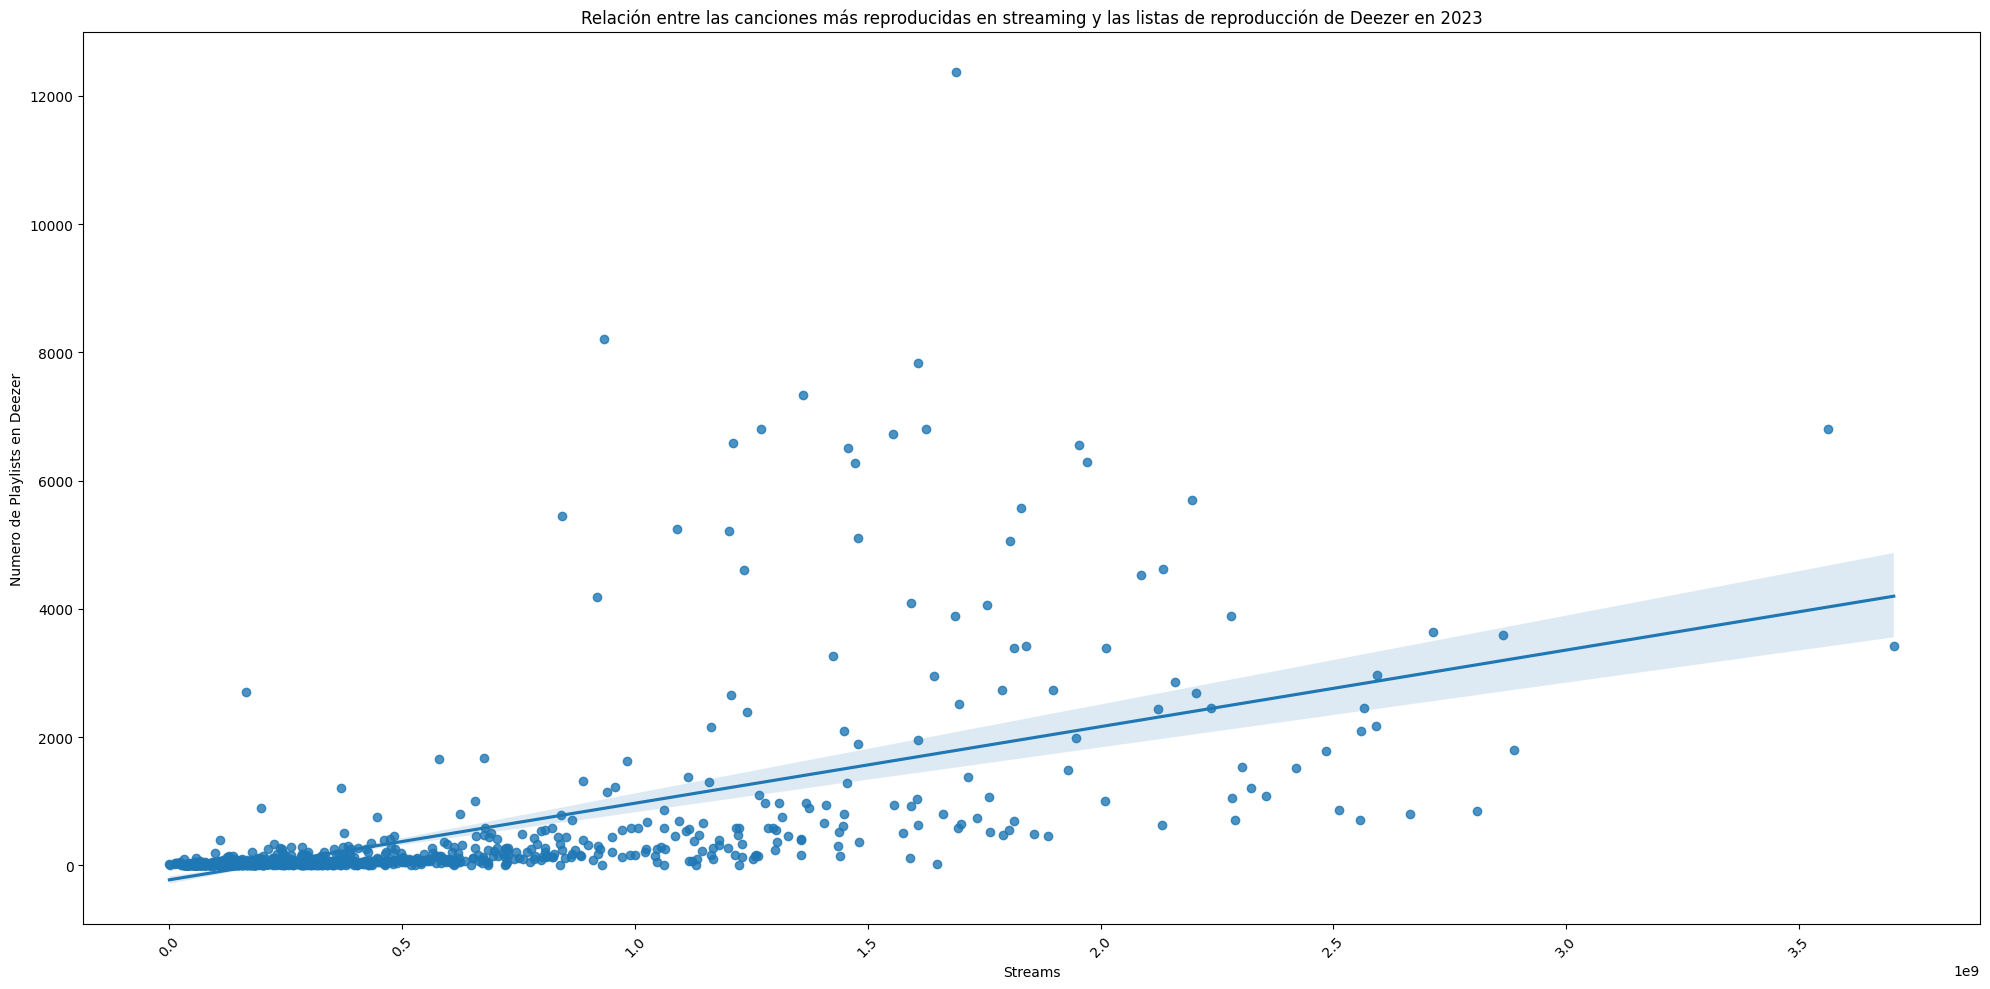

In [ ]:
plt.figure(figsize = (20, 10))

sns.regplot(x = 'streams', y = 'in_deezer_playlists', data = df, scatter = True, fit_reg = True)

plt.title('Relación entre las canciones más reproducidas en streaming y las listas de reproducción de Deezer en 2023')
plt.xlabel('Streams')
plt.ylabel('Numero de Playlists en Deezer')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

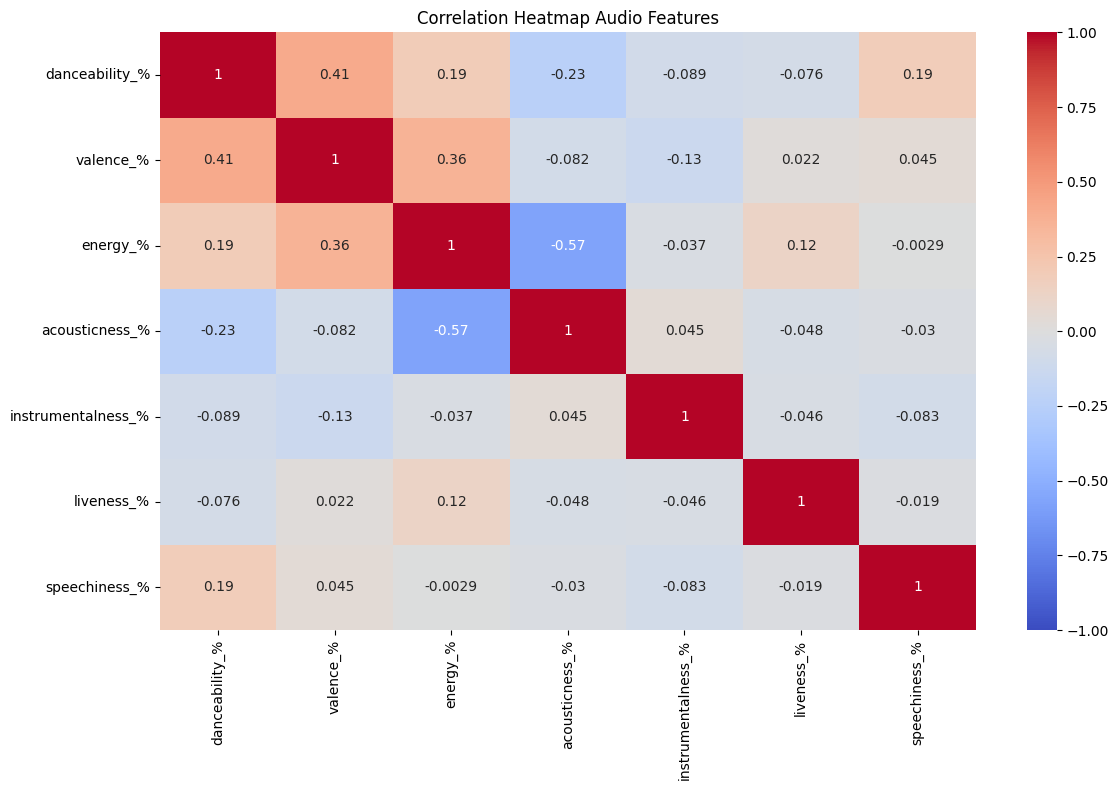

In [ ]:
plt.figure(figsize = (12, 8))
corr = df[['danceability_%','valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%']].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm', vmin =- 1, vmax = 1)
plt.title('Correlation Heatmap Audio Features')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
y = df_model['streams_log']  # Target

In [ ]:
from ast import keyword
#Variables predictorias
feature_columns = [
    'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
    'spotify_playlists_log', 'apple_playlists_log', 'deezer_playlists_log',
    'spotify_charts_sqrt', 'apple_charts_sqrt', 'artist_count', 'key', 'mode'
]

X = df_model[feature_columns]

In [ ]:
X.shape

(942, 16)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 55 to 123
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   track_name             942 non-null    object        
 1   artist(s)_name         942 non-null    object        
 2   artist_count           942 non-null    int64         
 3   in_spotify_playlists   942 non-null    int64         
 4   in_spotify_charts      942 non-null    int64         
 5   streams                942 non-null    int64         
 6   in_apple_playlists     942 non-null    int64         
 7   in_apple_charts        942 non-null    int64         
 8   in_deezer_playlists    942 non-null    int64         
 9   in_deezer_charts       942 non-null    int64         
 10  bpm                    942 non-null    int64         
 11  key                    850 non-null    object        
 12  mode                   942 non-null    object        
 13  danceabil

In [ ]:
categoricas = ['key', 'mode']

In [ ]:
numericas = [col for col in X.columns if col not in categoricas]

In [ ]:
# One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categoricas)

In [ ]:
print(f"\nDimensiones: {X_encoded.shape}")
print(f"Columnas después de encoding: {X_encoded.columns.tolist()}")



Dimensiones: (942, 27)
Columnas después de encoding: ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'spotify_playlists_log', 'apple_playlists_log', 'deezer_playlists_log', 'spotify_charts_sqrt', 'apple_charts_sqrt', 'artist_count', 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
# Escalamos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(753, 27)

In [ ]:
X_test_scaled.shape

(189, 27)

In [ ]:
resultados ={}

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
resultados['Linear Regression']= {
    'rmse': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'r2': r2_score(y_test, y_pred_lr)
}

In [ ]:
#Lasso
lasso_cv = LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, random_state=42, max_iter=10000)

In [ ]:
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-04, 1.20679264e-04, 1.45634848e-04, 1.75751062e-04,
       2.12095089e-04, 2.55954792e-04, 3.08884360e-04, 3.72759372e-04,
       4.49843267e-04, 5.42867544e-04, 6.55128557e-04, 7.90604321e-04,
       9.54095476e-04, 1.15139540e-03, 1.38949549e-03, 1.67683294e-03,
       2.02358965e-03, 2.44205309e-03, 2.94705170e-03, 3.55648031e-03,
       4.29193426e-03, 5.17947468e-0...
       1.93069773e-02, 2.32995181e-02, 2.81176870e-02, 3.39322177e-02,
       4.09491506e-02, 4.94171336e-02, 5.96362332e-02, 7.19685673e-02,
       8.68511374e-02, 1.04811313e-01, 1.26485522e-01, 1.52641797e-01,
       1.84206997e-01, 2.22299648e-01, 2.68269580e-01, 3.23745754e-01,
       3.90693994e-01, 4.71486636e-01, 5.68986603e-01, 6.86648845e-01,
       8.28642773e-01, 1.00000000e+00]),
        cv=5, max_iter=10000, random_state=42)

In [ ]:
print(f"Alpha óptimo de Lasso: {lasso_cv.alpha_:.6f}")

Alpha óptimo de Lasso: 0.033932


In [ ]:
y_pred_lasso = lasso_cv.predict(X_test_scaled)


In [ ]:
resultados['Lasso'] = { 'r2': r2_score(y_test, y_pred_lasso),
'rmse': np.sqrt(mean_squared_error(y_test, y_pred_lasso))}

In [ ]:
#resultados
resultados_df = pd.DataFrame(resultados).T
print("Modelos de Regresión ")
print(resultados_df.sort_values('r2', ascending=False))

Modelos de Regresión 
                   rmse  r2
Lasso               0.6 0.6
Linear Regression   0.7 0.6


In [ ]:
# Ver qué variables selecciona Lasso
lasso_coef = pd.DataFrame({
    'feature': X_encoded.columns,
    'coefficient': lasso_cv.coef_,
    'abs_coef': np.abs(lasso_cv.coef_)
}).sort_values('abs_coef', ascending=False)

In [ ]:
print(lasso_coef)

                  feature  coefficient  abs_coef
8   spotify_playlists_log          0.8       0.8
10   deezer_playlists_log          0.1       0.1
11    spotify_charts_sqrt          0.1       0.1
13           artist_count         -0.1       0.1
12      apple_charts_sqrt          0.0       0.0
9     apple_playlists_log          0.0       0.0
15                 key_A#         -0.0       0.0
7           speechiness_%         -0.0       0.0
3                energy_%         -0.0       0.0
6              liveness_%         -0.0       0.0
0                     bpm         -0.0       0.0
4          acousticness_%          0.0       0.0
5      instrumentalness_%         -0.0       0.0
1          danceability_%          0.0       0.0
2               valence_%         -0.0       0.0
14                  key_A          0.0       0.0
16                  key_B          0.0       0.0
17                 key_C#         -0.0       0.0
18                  key_D          0.0       0.0
19                 k

In [ ]:
eliminated_vars = lasso_coef[lasso_coef['coefficient'] == 0]
print(f"\nVariables eliminadas por Lasso: {len(eliminated_vars)}")
print(eliminated_vars['feature'].tolist())


Variables eliminadas por Lasso: 17
['bpm', 'acousticness_%', 'instrumentalness_%', 'danceability_%', 'valence_%', 'key_A', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor']


In [ ]:
coef_no_nulos = lasso_coef[lasso_coef['coefficient'] != 0]
print(f"\nVariables no nulas por Lasso:")
print(coef_no_nulos['feature'].tolist())


Variables no nulas por Lasso:
['spotify_playlists_log', 'deezer_playlists_log', 'spotify_charts_sqrt', 'artist_count', 'apple_charts_sqrt', 'apple_playlists_log', 'key_A#', 'speechiness_%', 'energy_%', 'liveness_%']


/tmp/ipython-input-3770462661.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


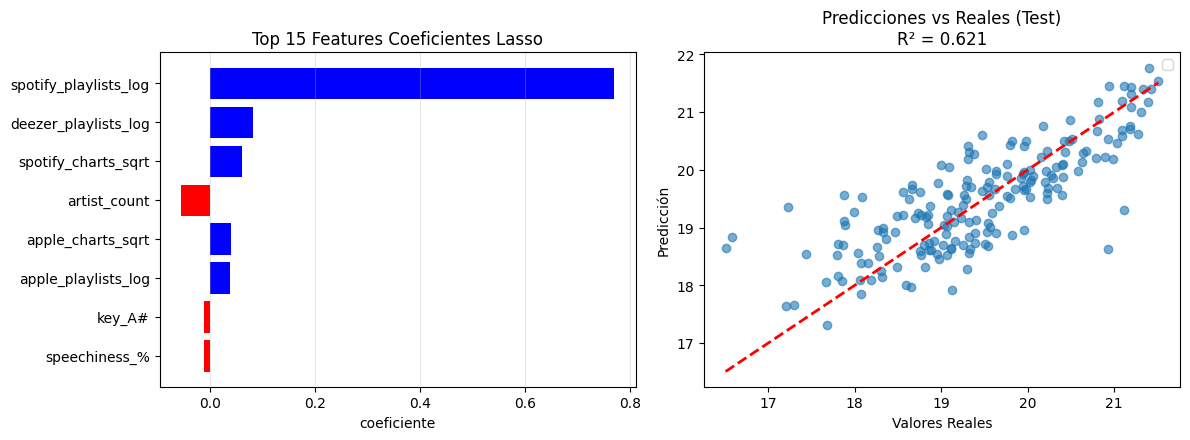

In [ ]:
plt.figure(figsize=(12, 8))
top_features = coef_no_nulos.head(8)

plt.subplot(2, 2, 1)
colors = ['red' if x < 0 else 'blue' for x in top_features['coefficient']]
plt.barh(top_features['feature'], top_features['coefficient'], color=colors)
plt.xlabel('coeficiente')
plt.title('Top 15 Features Coeficientes Lasso')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

r2 = resultados['Lasso']['r2']

# 2. Prediccion
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicción')
plt.title(f'Predicciones vs Reales (Test)\nR² = {r2:.3f}')

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('spotify-2023-limpio.csv', index=False, encoding='utf-8')

In [ ]:
#  múltiples targets
df_model['streams_continuous'] = df_model['streams_log']  # Regresión
df_model['is_hit_binary'] = df_model['streams_log'] > df_model['streams_log'].quantile(0.75)  # Clasificación binaria
df_model['success_tier'] = pd.qcut(df_model['streams_log'], q=3, labels=['Bajo', 'Medio', 'Alto'])  # Multiclase

print("Distribución de targets:")
print(f"Regresión (continuo): {len(df_model)} observaciones")
print(f"Clasificación binaria:")
print(df_model['is_hit_binary'].value_counts())
print(f"Clasificación multiclase:")
print(df_model['success_tier'].value_counts())

Distribución de targets:
Regresión (continuo): 942 observaciones
Clasificación binaria:
is_hit_binary
False    706
True     236
Name: count, dtype: int64
Clasificación multiclase:
success_tier
Bajo     314
Medio    314
Alto     314
Name: count, dtype: int64


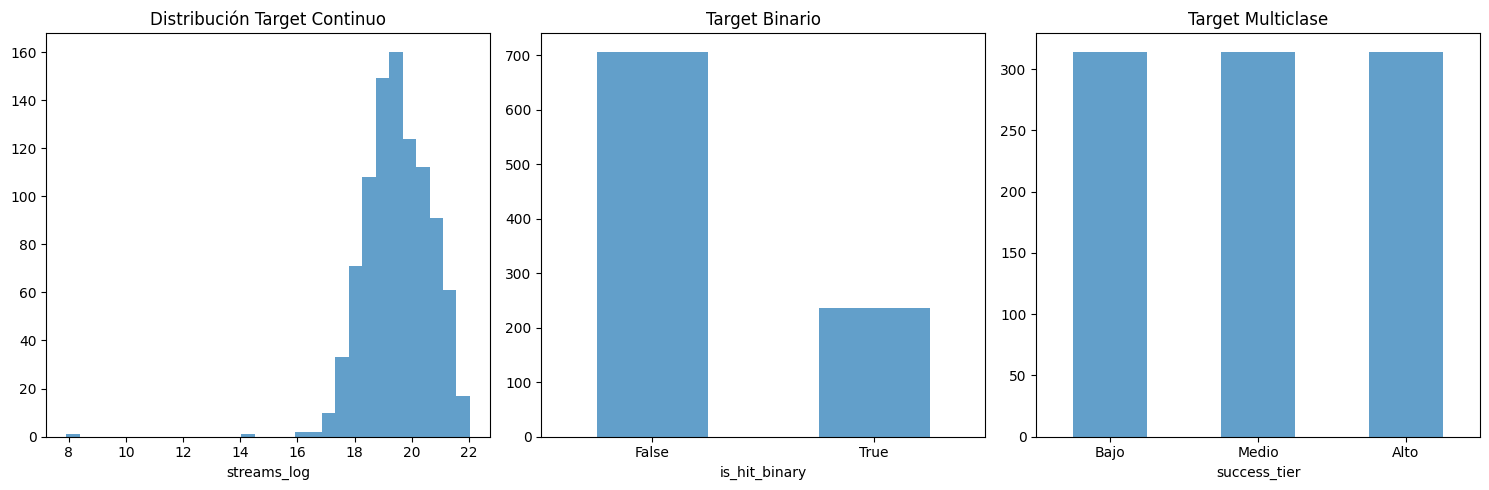

In [ ]:
# Comparar distribuciones
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_model['streams_continuous'], bins=30, alpha=0.7)
plt.title('Distribución Target Continuo')
plt.xlabel('streams_log')

plt.subplot(1, 3, 2)
df_model['is_hit_binary'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('Target Binario')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
df_model['success_tier'].value_counts().plot(kind='bar', alpha=0.7)
plt.title('Target Multiclase')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

Usamos is_hit como variable objetivo

In [ ]:
df_model['is_hit'] = df_model['streams_log'] > df_model['streams_log'].quantile(0.75)
print("Distribución:")
print(df_model['is_hit'].value_counts())
print(f"Proporción: {df_model['is_hit'].mean():.2%}")

Distribución:
is_hit
False    706
True     236
Name: count, dtype: int64
Proporción: 25.05%


In [ ]:
categoricas = ['key', 'mode']
numericas = [col for col in X.columns if col not in categoricas]
X_encoded = pd.get_dummies(X, columns=categoricas)

In [ ]:
# Quitamos columnas relacionadas con el target y las transformadas redundantes
numeric_features = df_model.select_dtypes(include=['int64', 'float64']).columns
features2=  [
    'bpm', 'danceability_%', 'valence_%', 'energy_%',
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
    'artist_count', 'key', 'mode']

In [ ]:
print(features2)

['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_count', 'key', 'mode']


In [ ]:
X = df_model[features2]
y = df_model['is_hit']

In [ ]:
categoricas = ['key', 'mode']
numerical = [col for col in features2 if col not in categoricas]

In [ ]:
X_encoded = pd.get_dummies(X, columns=categoricas, drop_first=True)

In [ ]:
print(f"\nDimensiones después de encoding: {X_encoded.shape}")
print(f"Columnas resultantes: {X_encoded.columns.tolist()}")


Dimensiones después de encoding: (942, 20)
Columnas resultantes: ['bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'artist_count', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Minor']


In [ ]:
#Imputamos con la media
#X = X.fillna(X.mean())

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(f"Train: {X_train.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")
print(f"Proporción de hits en train: {y_train.mean():.2%}")
print(f"Proporción de hits en test: {y_test.mean():.2%}")

Train: 753 muestras
Test: 189 muestras
Proporción de hits en train: 25.10%
Proporción de hits en test: 24.87%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced',random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
resultados['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, y_proba_rf),
    'predictions': y_pred_rf,
    'probabilities': y_proba_rf
}

In [ ]:
#XGBOOST
xgb = XGBClassifier(
    n_estimators=100,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),  # Balanceo
    random_state=42,
    eval_metric='logloss'
)

In [ ]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

In [ ]:
resultados['XGBoost'] = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'roc_auc': roc_auc_score(y_test, y_proba_xgb),
    'predictions': y_pred_xgb,
    'probabilities': y_proba_xgb
}

In [ ]:
#Logistic Regressión
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter = 1000)

In [ ]:
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

In [ ]:
resultados['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, y_proba_lr),
    'predictions': y_pred_lr,
    'probabilities': y_proba_lr
}

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, weights = 'distance')

In [ ]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

In [ ]:
resultados['KNN '] = {
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'roc_auc': roc_auc_score(y_test, y_proba_knn),
    'predictions': y_pred_knn,
    'probabilities': y_proba_knn
}

In [ ]:
print("Modelos:")

# Filter for classification models
classification_models = [
    model_name for model_name, metrics in resultados.items()
    if 'accuracy' in metrics and 'roc_auc' in metrics
]

comparison_df = pd.DataFrame({
    model: [resultados[model]['accuracy'], resultados[model]['roc_auc']]
    for model in classification_models
}, index=['Accuracy', 'ROC AUC']).T

print(comparison_df.sort_values('ROC AUC', ascending=False))

# Mejor modelo basado en ROC AUC
best_model_name = comparison_df['ROC AUC'].idxmax()
print(f"Mejor modelo: {best_model_name}")
print(f"   ROC AUC: {comparison_df.loc[best_model_name, 'ROC AUC']:.6f}")
print(f"   Accuracy: {comparison_df.loc[best_model_name, 'Accuracy']:.6f}")

# Reporte detallado del mejor modelo
best_model_predictions = resultados[best_model_name]['predictions']
print(f"{best_model_name}:")
print(classification_report(y_test, best_model_predictions))
print(f"Matriz de Confusión {best_model_name}:")
print(confusion_matrix(y_test, best_model_predictions))

Modelos:
                     Accuracy  ROC AUC
Random Forest             0.8      0.6
Logistic Regression       0.6      0.6
KNN                       0.7      0.6
XGBoost                   0.7      0.6
Mejor modelo: Random Forest
   ROC AUC: 0.633129
   Accuracy: 0.751323
Random Forest:
              precision    recall  f1-score   support

       False       0.76      0.97      0.85       142
        True       0.50      0.09      0.15        47

    accuracy                           0.75       189
   macro avg       0.63      0.53      0.50       189
weighted avg       0.70      0.75      0.68       189

Matriz de Confusión Random Forest:
[[138   4]
 [ 43   4]]


Las features musicales intrísecas de la música no son tan bueno predictores confiables de un hit en términos de streams. Factores como marketing, promoción,. algoritmo y poupularidad influyen.

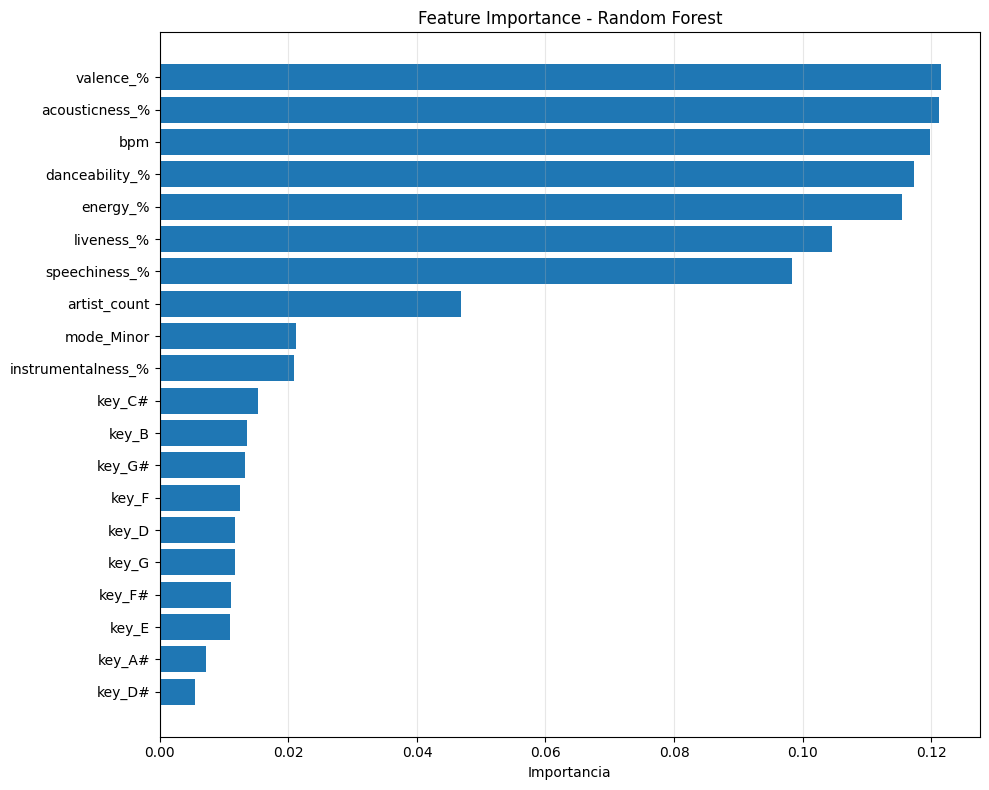

 FEATURE IMPORTANCE - RANDOM FOREST
               feature  importance
2            valence_%         0.1
4       acousticness_%         0.1
0                  bpm         0.1
1       danceability_%         0.1
3             energy_%         0.1
6           liveness_%         0.1
7        speechiness_%         0.1
8         artist_count         0.0
19          mode_Minor         0.0
5   instrumentalness_%         0.0
11              key_C#         0.0
10               key_B         0.0
18              key_G#         0.0
15               key_F         0.0
12               key_D         0.0


In [ ]:
#Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)


plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importancia')
plt.title('Feature Importance - Random Forest')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(" FEATURE IMPORTANCE - RANDOM FOREST")
print(feature_importance.sort_values('importance', ascending=False).head(15))


In [ ]:
#Hasta Aqui